# Homework 4: Simulation, Sampling, and Bootstrapping

## Due Sunday, November 10th at 11:59PM

Welcome to Homework 4! This homework will cover:
- Simulations (see [CIT 9.3-9.4](https://inferentialthinking.com/chapters/09/3/Simulation.html))
- Sampling and Empirical Distributions (see [CIT 10-10.4](https://inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html))
- Bootstrapping and Confidence Intervals (see [CIT 13.2](https://inferentialthinking.com/chapters/13/2/Bootstrap.html) and [CIT 13.3](https://inferentialthinking.com/chapters/13/3/Confidence_Intervals.html))

### Instructions

Remember to start early and submit often. You are given six slip days throughout the quarter to extend deadlines. See the syllabus for more details. With the exception of using slip days, late work will not be accepted unless you have made special arrangements with your instructor.

**Important**: For homeworks, the `otter` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach). These are great questions for office hours (the schedule can be found [here](https://dsc10.com/calendar)) or Ed. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

In [273]:
# Please don't change this cell, but do make sure to run it.
import babypandas as bpd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import otter
grader = otter.Notebook()

## 1. Lucky Triton Lotto, Continued  🔱 🎱 🧜

In the last homework, we calculated the probability of winning the grand prize (free housing) on a Lucky Triton Lotto lottery ticket, and found that it was quite low 😭.

In [274]:
# Just run this cell, do not change it!
free_housing_chance = (1 / 29) * (1 / 28) * (1 / 27) * (1 / 26) * (1 / 25) * (1 / 12)
free_housing_chance

5.8477069971322845e-09

In this question, we'll approach the same question not using math, but using simulation. 

It's important to remember how this lottery works:

- First, you pick five **different** numbers, one at a time, from 1 to 29, representing that according to [USNews](https://www.usnews.com/best-colleges/university-of-california-san-diego-1317), UCSD is ranked 29th in the nation for best universities to attend for 2024-2025.
- Then, you separately pick a number from 1 to 12. This is because UCSD's Data Science program is ranked 12th in [USNews's](https://www.usnews.com/best-colleges/rankings/computer-science/data-analytics-science) best undergraduate Data Science programs list (though we think it's number one). Let's say you select 3.
- The six numbers you have selected, or  **your numbers**, can be represented all together as (7, 12, 24, 15, 13, 3). This is a _sequence_ of six numbers – **order matters**!

The **winning numbers** are chosen by King Triton drawing five balls, one at a time, **without replacement**, from a pot of white balls numbered 1 to 29. Then, he draws a gold ball, the Tritonball, from a pot of gold balls numbered 1 to 12. Both pots are completely separate, hence the different ball colors. For example, maybe the winning numbers are (15, 9, 24, 23, 1, 3).

We’ll assume for this problem that in order to win the grand prize (free housing), all six of your numbers need to match the winning numbers and be in the **exact same order**. In other words, your entire sequence of numbers must be exactly the same as the sequence of winning numbers. However, if some numbers in your sequence match up with the corresponding number in the winning sequence, you will still win some Triton Cash. 

Suppose again that you select (7, 12, 24, 15, 13, 3) and the winning numbers are (15, 9, 24, 23, 1, 3). In this case, two of your numbers are considered to match two of the winning numbers. 
- Your numbers: (7, 12, **24**, 15, 13, **3**)
- Winning numbers: (15, 9, **24**, 23, 1, **3**)

You won't win free housing, but you will win some Triton Cash. Note that although both sequences include the number 15 within the first five numbers (representing a white ball), since they are in different positions, that's not considered a match.


**Question 1.1.** Implement a function called `simulate_one_ticket`. It should take no arguments, and it should return an array with 6 random numbers, simulating how the numbers are selected for a single Lucky Triton Lotto ticket. The first five numbers should all be randomly chosen without replacement, from 1 to 29. The last number should be between 1 and 12.

In [275]:
def simulate_one_ticket():
    """Simulate one Lucky Triton Lotto ticket."""
    ticket = np.array([])
    
    first5_choices = np.arange(1,30)
    sixth_choice = np.arange(1,13)
    
    ticket = np.random.choice(first5_choices,5,replace = False)#array of first 5 samples
    sixth_sample = np.random.choice(sixth_choice,1)# last item to be sampled
    
    ticket = np.append(ticket,sixth_sample)
    
    return ticket
simulate_one_ticket()

array([24, 21,  9,  8,  7,  1])

In [276]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2.** It's draw day. You checked the winning numbers King Triton drew, which happened to be **(15, 9, 24, 23, 1, 3)**. Below, calculate how many matches there are between the winning numbers and a randomly generated ticket, and save the result in `num_matches`. Remember, order matters when counting matches!

***Hint:*** You don't need a `for`-loop for this question. There is a one-line solution using `np.count_nonzero`.

In [277]:
winning = np.array([15, 9, 24, 23, 1, 3])
simulated_ticket = simulate_one_ticket()
num_matches = np.count_nonzero(winning==simulated_ticket)

print(f"The number of matches between the winning numbers {winning} and the simulated ticket {simulated_ticket} is {num_matches}.")

The number of matches between the winning numbers [15  9 24 23  1  3] and the simulated ticket [ 3 14 12  2 17  4] is 0.


In [278]:
grader.check("q1_2")

q1_2 results: All test cases passed!

**Question 1.3.** You are disappointed because you bought a lottery ticket but you did not win free housing. To make yourself feel better, you write a simulation to remind yourself how unlikely it is to win the grand prize. 

Implement a simulation where you call the function `simulate_one_ticket` 100,000 times. In your 100,000 tickets, **how many times did you win the grand prize (free housing)?** Assign your answer to `count_free_housing`. (It would cost a fortune if you were to buy 100,000 tickets – it's pretty nice to be able to simulate this experiment instead of doing it in real life!) 

***Hint:*** Start by writing a simulation where you only buy 10 tickets. Once you are sure you have that figured out, then ramp it up to 100,000 tickets. This is a good general practice for writing simulations: start small! It may take a little while (up to a minute) for Python to perform the calculations when you are buying 100,000 tickets. 

In [279]:
winning = np.array([15, 9, 24, 23, 1, 3])
# ticket_simulated = simulate_one_ticket()

count_free_housing =0
for i in np.arange(0,100_000):
    #
    if np.count_nonzero(winning ==simulate_one_ticket()) ==6:
        count_free_housing +=1
# count_free_housing = 
count_free_housing

0

In [280]:
grader.check("q1_3")

q1_3 results: All test cases passed!

How many times did you win free housing? Remember, the mathematical probability of winning free housing is quite low, on the order of $10^{-11}$. That's a lot lower than 1 in 100,000, which is $10^{-5}$.

**Question 1.4.** As we've seen, you would need to be extremely lucky to win the grand prize. To encourage more students to buy Lucky Triton Lotto tickets despite the terrible odds, there are some additional prizes. Students can win Triton Cash if *some* of their numbers match the corresponding winning numbers, as described in the introduction. Again, simulate the act of buying 100,000 tickets, but this time find **the greatest number of matches achieved by any of your tickets**, and assign this number to `most_matches`. 

For example, if 90,000 of your tickets matched 1 winning number and 10,000 of your tickets matched 2 winning numbers, then you would set `most_matches` to 2. If 99,999 of your tickets matched 1 winning number and one of your tickets matched 4 winning numbers, you would set `most_matches` to 4. If you happened to win the grand prize on one of your tickets, you would set `most_matches` to 6. 

***Hint:*** There are several ways to approach this; one way involves storing the number of matches per ticket in an array and finding the largest number in that array. Another way involves keeping track of the maximum matches you've encountered so far. 

In [281]:
def most_matches(win_array,num_of_simulations):
    '''If theres a number in ticket that is in win_array, position in which it matches doesnt matter
    it will return the count'''
    counter_array = np.zeros([num_of_simulations])
     
    for i in np.arange(num_of_simulations):
        ticket = simulate_one_ticket()#simulated ticket, each simulation it'll be different
        match = 0
        for j in np.arange(len(ticket)):#change this if the ticket size isn't length 6 anymore
            if ticket[j] in win_array:
            # if a number in the ticket is in the win array  
                match+=1
        counter_array[i]=match
    
    #now return the max of this array
    max_match = 0
    max_match = counter_array[0] #set the first max to be the first item of counter_array
    for i in np.arange(1,len(counter_array)):
        if counter_array[i]>counter_array[i-1]:
            max_match = counter_array[i]
    return max_match

In [282]:
winning = np.array([15, 9, 24, 23, 1, 3])
most_matches = most_matches(winning,100_000)
most_matches

2.0

In [283]:
grader.check("q1_4")

q1_4 results: All test cases passed!

**Question 1.5.** Suppose one Lucky Triton Lotto ticket costs $5.

The Lucky Triton Lotto advertisement on Instagram promises you will never lose money because of the following generous prizes:

- Win $10 with a 1-number match

- Win $25 with a 2-number match

- Win $100 with a 3-number match

- Win $1,000 with a 4-number match

- Win $5,000 with a 5-number match

- Win $20,000 with a 6-number match (free housing!)

If you had the money to buy 100,000 tickets, what would be your net winnings from buying these tickets? Since this is net winnings, this should account for the prizes you win and the cost of buying the tickets. Assign the amount to `net_winnings`. Note that a positive value means you won money overall, and a negative value means you lost money overall. Do you believe the advertisement's claims?

The winning numbers are the same from the previous part: **(15, 9, 24, 23, 1, 3)**.

***Hint:*** Again, there are a few ways you could approach this problem. One way involves generating another 100,000 random tickets and counting the amount earned per ticket, adding to a running total. Alternatively, if you created an array of the number of matches per ticket in Question 1.4, you could loop through that array. For practice, it's recommended that you try solving this problem multiple ways!

In [284]:
corresponding_array = np.zeros([6],dtype=int)# this array will match the number of matches with its position
for i in np.arange(100_000):#this number can change based on # of simulation
    temp_arr = np.unique(simulate_one_ticket()) #i did this so that my code doesn't count a match twice
    matches =0
    
    matches = (np.count_nonzero(temp_arr==winning))
#     for j in temp_arr: #for number(j) in simulated ticket(temp_arr)
#         if j in winning:
#             matches +=1
#         #print(f" checking for {j} in winning: {winning}")
    
    if matches ==1:
        corresponding_array[0] +=1
    elif matches ==2:
        corresponding_array[1] +=1
    elif matches ==3:
        corresponding_array[2] +=1
    elif matches ==4:
        corresponding_array[3] +=1
    elif matches ==5:
        corresponding_array[4] +=1
    elif matches ==6:
        corresponding_array[5] +=1
    #print(f" corresponding array: {corresponding_array}\n")    
corresponding_array
net_winnings = (corresponding_array*np.array([10,25,100,1000,5000,20000])).sum()-500_000
net_winnings 

/tmp/ipykernel_168/3896564951.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  matches = (np.count_nonzero(temp_arr==winning))


-399320

In [285]:
grader.check("q1_5")

q1_5 results: All test cases passed!

## 2. Sampling with World Cup Data ⚽

In this question, we will use a [dataset](https://www.kaggle.com/datasets/swaptr/fifa-world-cup-2022-player-data?select=player_stats.csv) consisting of information about every player that played in the 2022 World Cup. We'll use this data to get some practice with sampling. Run the cell below to load the data into a DataFrame.

In [286]:
# Just run this cell, do not change it!
world_cup = bpd.read_csv('data/world_cup_players.csv')
world_cup

,Player,Position,Team,Age,Club,Games,Shots,Goals,Touches,Passes
0,Aaron Mooy,MF,Australia,32-094,Celtic,4,1,0,255.0,217.0
1,Aaron Ramsey,MF,Wales,31-357,Nice,3,1,0,147.0,112.0
2,Abdelhamid Sabiri,MF,Morocco,26-020,Sampdoria,5,3,0,86.0,58.0
3,Abdelkarim Hassan,DF,Qatar,29-112,Al Sadd SC,3,6,0,193.0,161.0
4,Abderrazak Hamdallah,FW,Morocco,32-001,Al-Ittihad,4,2,0,28.0,15.0
...,...,...,...,...,...,...,...,...,...,...
675,Ángel Di María,MF,Argentina,34-307,Juventus,5,6,1,201.0,168.0
676,Ángelo Preciado,DF,Ecuador,24-303,Genk,3,4,0,162.0,129.0
677,Éder Militão,DF,Brazil,24-334,Real Madrid,4,5,0,306.0,277.0
678,Óscar Duarte,DF,Costa Rica,33-198,Al-Wehda,3,0,0,132.0,98.0


We've provided a function called `compute_statistics` that takes as input a DataFrame with two columns, `'Shots'` and `'Goals'`, and then:
- draws a histogram of `'Shots'`,
- draws a histogram of `'Goals'`, and
- returns a two-element array containing the mean `'Shots'` and mean `'Goals'`.

Run the cell below to define the `compute_statistics` function, and a helper function called `histograms`. Don't worry about how this code works, and please don't change anything.

In [287]:
# Don't change this cell, just run it.
def histograms(df):
    shots = df.get('Shots').values
    goals = df.get('Goals').values
    
    plt.subplots(1, 2, figsize=(15, 4), dpi=100)

    plt.subplot(1, 2, 1)
    plt.hist(shots, density=True, alpha=0.5, color='blue', ec='w', bins=np.arange(0, 20, 1))
    plt.title('Distribution of Shots')

    plt.subplot(1, 2, 2)
    plt.hist(goals, density=True, alpha=0.5, color='blue', ec='w', bins=np.arange(0, 8, 1))
    plt.title('Distribution of Goals')
    
def compute_statistics(shots_and_goals_data, draw=True):
    if draw:
        histograms(shots_and_goals_data)
    avg_shots = shots_and_goals_data.get('Shots').mean()
    avg_goals = shots_and_goals_data.get('Goals').mean()
    avg_array = np.array([avg_shots, avg_goals]) 
    return avg_array

We can use this `compute_statistics` function to show the distribution of `'Shots'` and `'Goals'` and compute their means, for any collection of players. 

Run the next cell to show these distributions and compute the means for all World Cup players. Notice that an array containing the mean `'Shots'` and mean `'Goals'` values is displayed before the histograms.

array([2.10735294, 0.25      ])

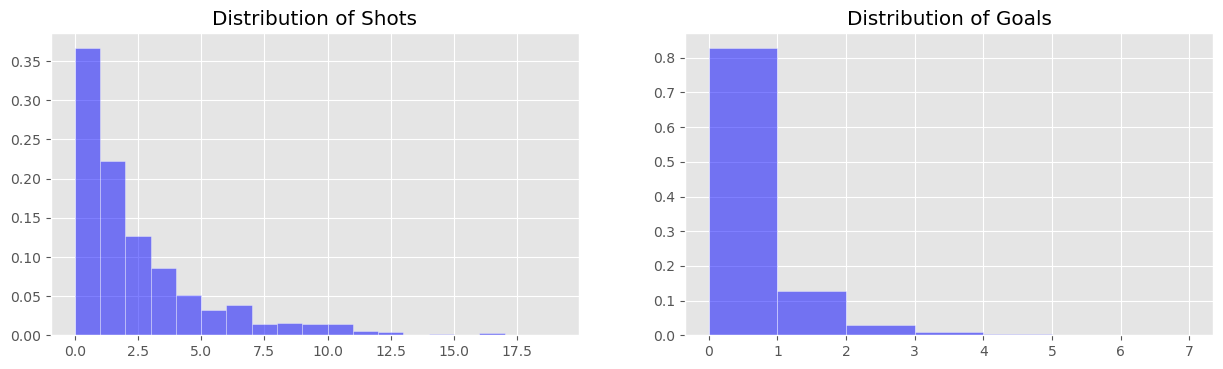

In [288]:
world_cup_stats = compute_statistics(world_cup)
world_cup_stats

Now, imagine that instead of having access to the full *population* of World Cup players, we only have access to data on a smaller subset of players, or a *sample*.  For 680 players, it's not so unreasonable to expect to see all the data, but usually we aren't so lucky.  Instead, we often make *statistical inferences* about a large underlying population using a smaller sample.

**Statistical inference** is the process of using data in a sample to _infer_ some characteristic about the population from which the sample was drawn. A common strategy for statistical inference is to estimate a parameter of the population by computing a corresponding statistic on a sample. This strategy sometimes works well and sometimes doesn't.  The degree to which it gives us useful answers depends on several factors.

One very important factor in the utility of samples is how they were gathered. Let's look at some different sampling strategies.

### Convenience sampling
One sampling methodology, which is **generally a bad idea**, is to choose players which are somehow convenient to sample.  For example, you might choose players from a team that's near your house, since it's easier to collect information about them.  This is called *convenience sampling*.

**Question 2.1.**  Suppose you only have access to data on the World Cup players who play certain positions: `'GK'` for goalkeepers, and `'DF'` for defenders. Assign `convenience_sample` to a subset of `world_cup` that contains only the rows for players that play one of these positions.

In [289]:
convenience_sample = world_cup[(world_cup.get("Position")== "GK") | (world_cup.get("Position")=="DF")]
convenience_sample

,Player,Position,Team,Age,Club,Games,Shots,Goals,Touches,Passes
3,Abdelkarim Hassan,DF,Qatar,29-112,Al Sadd SC,3,6,0,193.0,161.0
6,Abdou Diallo,DF,Senegal,26-228,RB Leipzig,4,1,0,210.0,186.0
9,Abdulelah Al-Amri,DF,Saudi Arabia,25-337,Al-Nassr,3,1,0,129.0,104.0
11,Abdullah Madu,DF,Saudi Arabia,29-156,Al-Nassr,1,0,0,19.0,13.0
13,Abolfazl Jalali,DF,IR Iran,24-175,Esteghlal,1,0,0,34.0,29.0
...,...,...,...,...,...,...,...,...,...,...
665,Youssouf Sabaly,DF,Senegal,29-288,Betis,4,2,0,253.0,219.0
667,Youstin Salas,DF,Costa Rica,26-184,Deportivo Saprissa,2,0,0,27.0,19.0
676,Ángelo Preciado,DF,Ecuador,24-303,Genk,3,4,0,162.0,129.0
677,Éder Militão,DF,Brazil,24-334,Real Madrid,4,5,0,306.0,277.0


In [290]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.2.** Assign `convenience_stats` to an array of the mean `'Shots'` and mean `'Goals'` of your convenience sample.  Since they're computed on a sample, these are called *sample means*. 

***Hint:*** Use the function `compute_statistics`; it's okay if histograms are displayed as well.

array([0.97026022, 0.07434944])

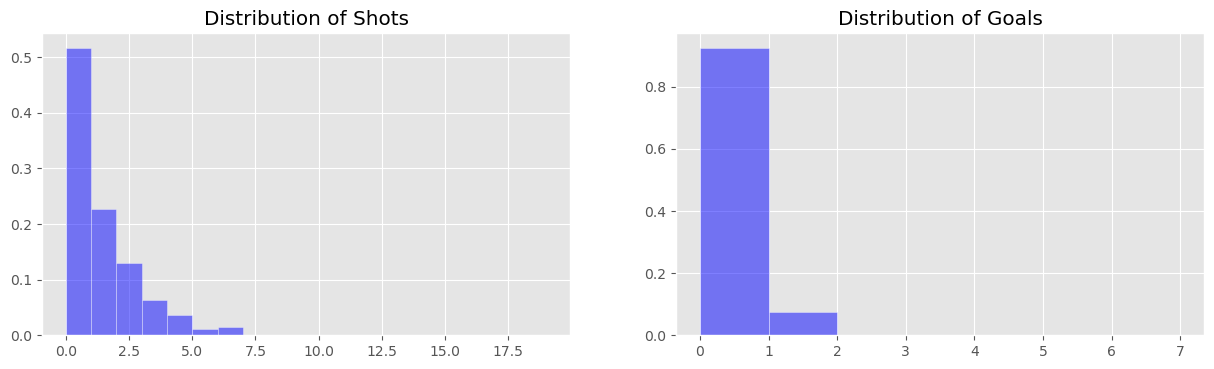

In [291]:
convenience_stats = compute_statistics(convenience_sample)
convenience_stats

In [292]:
grader.check("q2_2")

q2_2 results: All test cases passed!

Next, we'll compare the distribution of `'Shots'` in our convenience sample to the distribution of `'Shots'` for all the players in our dataset.

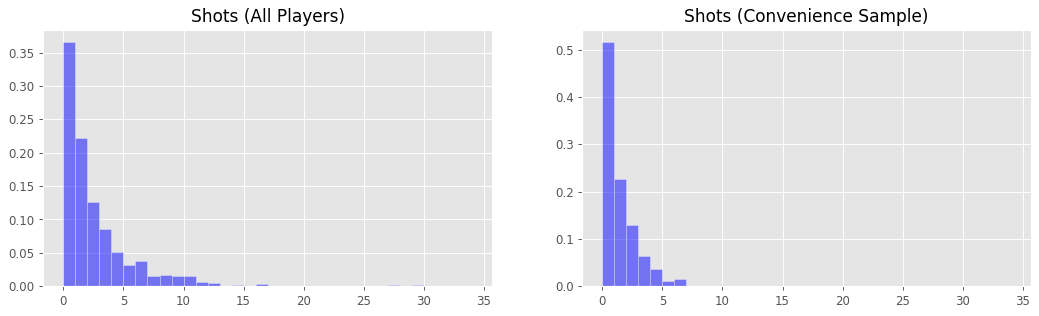

In [293]:
# Just run this cell, do not change it!
def compare_shots(first, second, first_title, second_title):
    """Compare the shots in two DataFrames."""
    bins = np.arange(0, 35, 1)
    
    plt.subplots(1, 2, figsize=(15, 4), dpi=85)

    plt.subplot(1, 2, 1)
    plt.hist(first.get('Shots'), bins=bins, density=True, ec='w', color='blue', alpha=0.5)
    plt.title(f'Shots ({first_title})')
    
    plt.subplot(1, 2, 2)
    plt.hist(second.get('Shots'), bins=bins, density=True, ec='w', color='blue', alpha=0.5)
    plt.title(f'Shots ({second_title})')

compare_shots(world_cup, convenience_sample, 'All Players', 'Convenience Sample')

**Question 2.3.** From what you see in the histograms above, did the convenience sample give us an accurate picture of the shots for the full population of World Cup players?  Why or why not?

Assign either 1, 2, 3, or 4 to the variable `sampling_q3` below. 
1. Yes. The sample is large enough, so it is an accurate representation of the population.
1. No. Convenience samples generally don't give us an accurate representation of the population.
1. No. Normally convenience samples give us an accurate representation of the population, but we just got unlucky.
1. No. Normally convenience samples give us an accurate representation of the population, but only if the sample size is large enough. Our convenience sample here was too small.

In [294]:
sampling_q3 = 2

In [295]:
grader.check("q2_3")

q2_3 results: All test cases passed!

### Simple random sampling
A more principled approach is to sample uniformly at random from the players.  If we ensure that each player is selected at most once, this is a **random sample without replacement**, sometimes called a "**simple random sample**" or "**SRS**".  Imagine writing down each player's name on a card, putting the cards in a hat, and shuffling the hat.  To sample, pull out cards one by one and set them aside, stopping when the specified *sample size* is reached.

We've produced two simple random samples of `world_cup`: the variable `small_srs_data` contains a SRS of size 30, and the variable `large_srs_data` contains a SRS of size 360.

Now we'll run the same analyses on the small simple random sample, the large simple random sample, and the convenience sample. The subsequent code draws the histograms and computes the means for `'Goals'` and `'Shots'`.

Full data stats:                  [2.10735294 0.25      ]
Small SRS stats:                  [2.46666667 0.33333333]
Large SRS stats:                  [2.13055556 0.24444444]
Convenience sample stats:         [0.97026022 0.07434944]


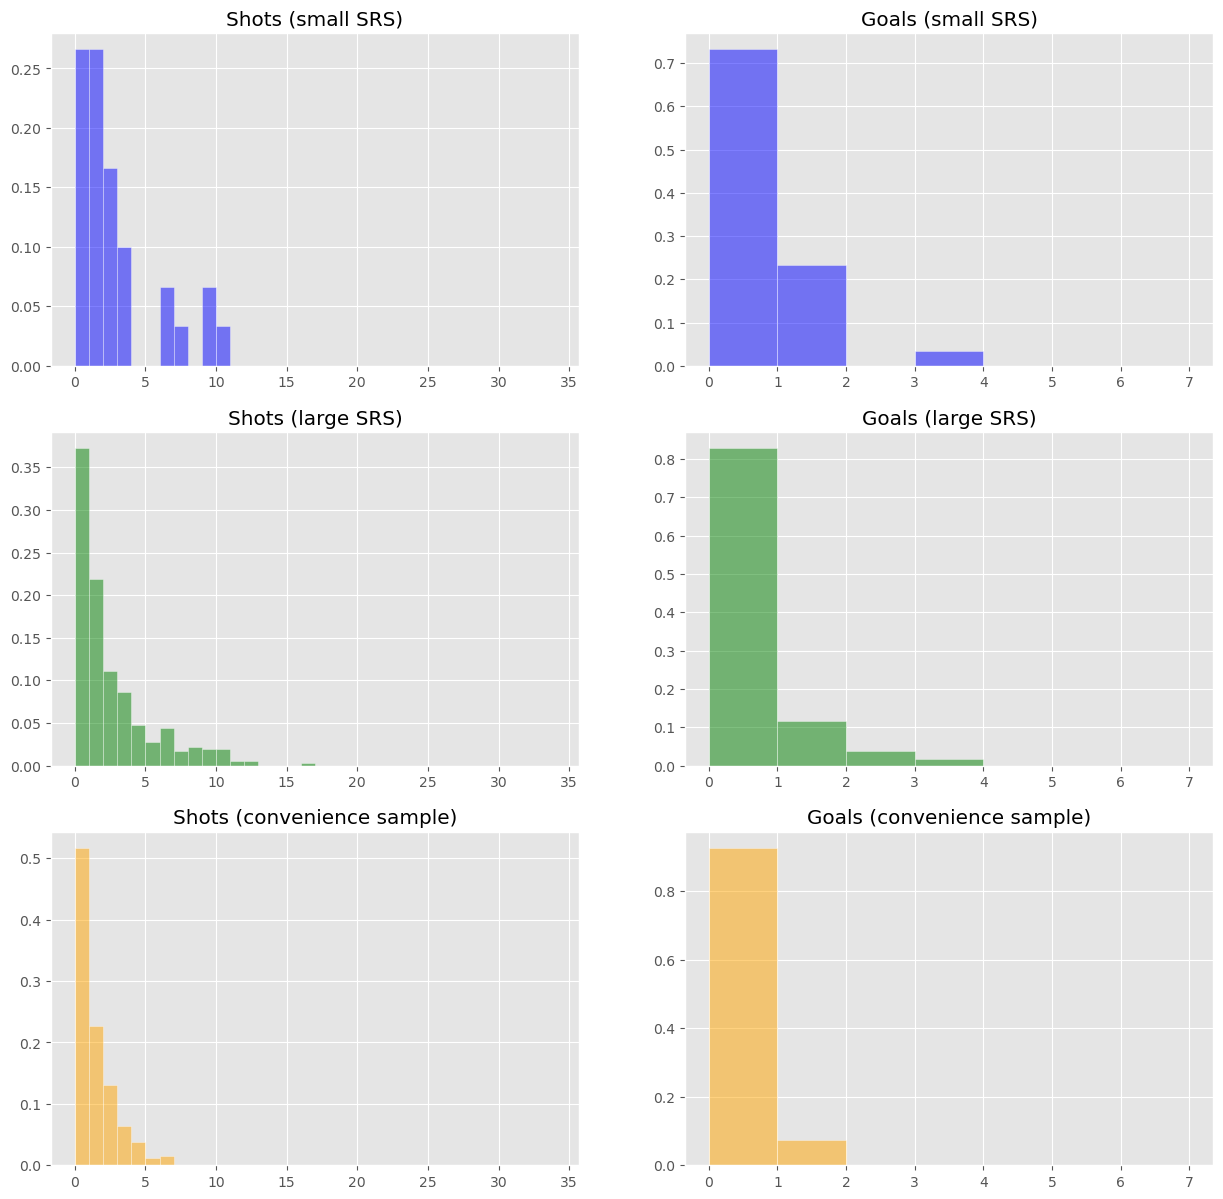

In [296]:
# Don't change this cell, but do run it.
small_srs_data = bpd.read_csv('data/small_srs.csv')
large_srs_data = bpd.read_csv('data/large_srs.csv')

small_stats = compute_statistics(small_srs_data, draw=False);
large_stats = compute_statistics(large_srs_data, draw=False);
convenience_stats = compute_statistics(convenience_sample, draw=False);

print('Full data stats:                 ', world_cup_stats)
print('Small SRS stats:                 ', small_stats)
print('Large SRS stats:                 ', large_stats)
print('Convenience sample stats:        ', convenience_stats)

color_dict = {
    'small SRS': 'blue',
    'large SRS': 'green',
    'convenience sample': 'orange'
}

plt.subplots(3, 2, figsize=(15, 15), dpi=100)
i = 1

for df, name in zip([small_srs_data, large_srs_data, convenience_sample], color_dict.keys()):
    plt.subplot(3, 2, i)
    i += 2
    plt.hist(df.get('Shots'), density=True, alpha=0.5, color=color_dict[name], ec='w', 
             bins=np.arange(0, 35, 1))
    plt.title(f'Shots ({name})');

i = 2
for df, name in zip([small_srs_data, large_srs_data, convenience_sample], color_dict.keys()):
    plt.subplot(3, 2, i)
    i += 2
    plt.hist(df.get('Goals'), density=True, alpha=0.5, color=color_dict[name], ec='w', 
             bins=np.arange(0, 8, 1))
    plt.title(f'Goals ({name})');

### Producing simple random samples
Often it's useful to take random samples even when we have a larger dataset available.  One reason is that doing so can help us understand how inaccurate other samples are.

As we saw in [Lecture 13](https://dsc10.com/resources/lectures/lec13/lec13.html#Sampling-rows-from-a-DataFrame), DataFrames have a `.sample` method for producing simple random samples.  Note that its default is to sample **without** replacement, which aligns with how simple random samples are drawn.

**Question 2.4.** Produce a simple random sample of size 30 from `world_cup`. Store an array containing the mean `'Shots'` and mean `'Goals'` of your SRS in `my_small_stats`. Again, it's fine if histograms are displayed.

array([1.8       , 0.33333333])

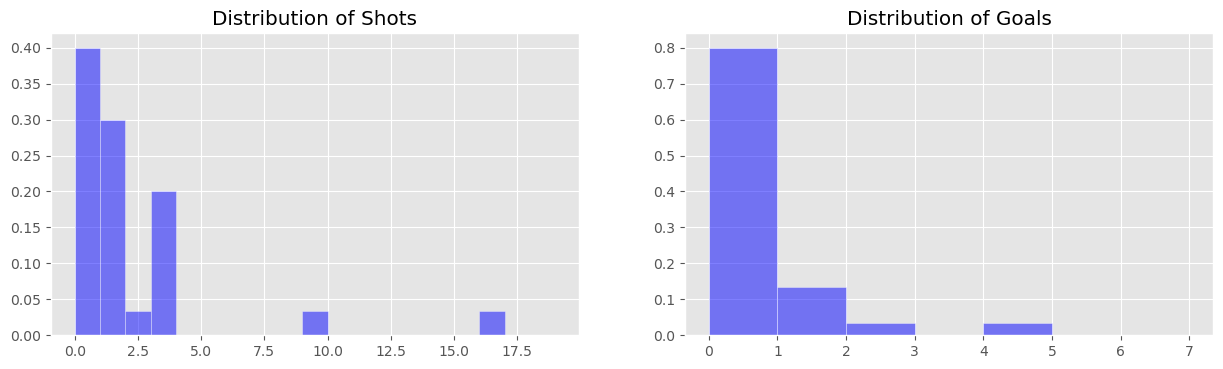

In [297]:
my_small_stats = compute_statistics(world_cup.sample(30,replace=False))
my_small_stats

Run the cell above many times, to collect new samples and compute their sample means.

<br>

Now, recall, `small_stats` is an array containing the mean `'Shots'` and mean `'Goals'` for the one small SRS that we provided you with:

In [298]:
small_stats

array([2.46666667, 0.33333333])

Answer the following two-fold question:
- Are the values in `my_small_stats` (the mean `'Shots'` and `'Goals'` for **your** small SRS) similar to the values in `small_stats` (the mean `'Shots'` and `'Goals'` for the small SRS **we provided you with**)? 
- Each time you collect a new sample – i.e. each time you re-run the cell where `my_small_stats` is defined – do the values in `my_small_stats` change a lot?

Assign either 1, 2, 3, or 4 to the variable `sampling_q4` below.
1. The values in `my_small_stats` are identical to the values in `small_stats`, and change a bit each time a new sample is collected.
1. The values in `my_small_stats` are identical to the values in `small_stats`, and don't change at all each time a new sample is collected.
1. The values in `my_small_stats` are slightly different from the values in `small_stats`, and change a bit each time a new sample is collected.
1. The values in `my_small_stats` are very different from the values in `small_stats`, and don't change at all each time a new sample is collected.

In [299]:
sampling_q4 = 3

In [300]:
grader.check("q2_4")

q2_4 results: All test cases passed!

**Question 2.5.** Similarly, create a simple random sample of size 360 from `world_cup` and store an array of the sample's mean `'Shots'` and mean `'Goals'` in `my_large_stats`.

array([2.00285714, 0.25142857])

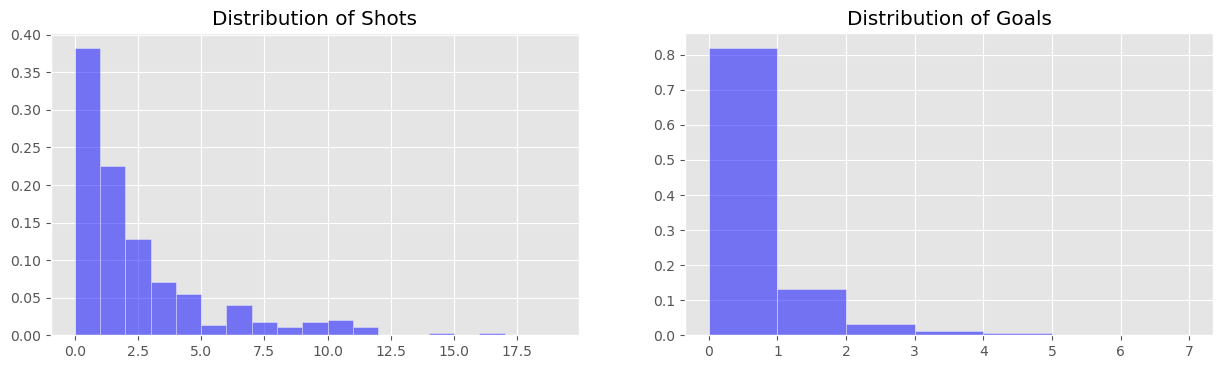

In [301]:
my_large_stats = compute_statistics(world_cup.sample(350,replace=False))
my_large_stats

Run the cell in which `my_large_stats` is defined many times. Do the histograms and  mean statistics (mean `'Shots'` and mean `'Goals'`) seem to change more or less across samples of size 360 than across samples of size 30?

Assign either 1, 2, or 3 to the variable `sampling_q5` below. 

1. The statistics change *less* across samples of size 360 than across samples of size 30.
1. The statistics change an *equal amount* across samples of size 360 and across samples of size 30.
1. The statistics change *more* across samples of size 360 than across samples of size 30.

In [302]:
sampling_q5 = 1

In [303]:
grader.check("q2_5")

q2_5 results: All test cases passed!

## 3. Milk Tea, Yippee! 🥛🍵

You are planning to open a milk tea shop in La Jolla! To get a sense of the local residents' milk tea preferences, you survey 200 randomly selected La Jolla residents and ask which type of tea they prefer the most among six options – `'jasmine'`, `'oolong'`, `'black'`, `'golden'`, `'matcha'`, `'Thai'`. 

<center><img src="images/tea.png" width=70%></center>

Run the next cell to load in the results of the survey.

In [304]:
survey = bpd.read_csv('data/tea.csv')
survey#[survey.get("tea")=="matcha"]

,tea
0,jasmine
1,golden
2,black
3,matcha
4,matcha
...,...
195,black
196,matcha
197,oolong
198,black


What you're truly interested in, though, is the proportion of *all La Jolla residents* that prefer each type of tea. These are *population parameters* (plural, because there are six proportions).

Your friends tell you that matcha tea is popular (it doesn't just taste like grass!) and that your shop should focus on matcha tea-based creations. To make an informed decision, you decide to look at your survey data to determine the proportion of La Jolla residents that prefer `'matcha'` tea over all other types of teas.

**Question 3.1.** Start by calculating the proportion of residents in your sample who prefer `'matcha'` tea. Assign this value to `matcha_proportion`.



In [305]:
matcha_proportion = survey[survey.get('tea')=='matcha'].shape[0] / survey.shape[0]
matcha_proportion

0.19

In [306]:
grader.check("q3_1")

q3_1 results: All test cases passed!

You're done... or are you? You have a single estimate for the true proportion of residents who prefer `'matcha'` tea. However, you don't know how close that estimate is, or how much it could have varied if you'd had a different sample. In other words, you have an estimate, but no understanding of how close that estimate is to the true proportion of all local residents who prefer `'matcha'` tea.

This is where the idea of resampling via **[bootstrapping](https://inferentialthinking.com/chapters/13/2/Bootstrap.html)** comes in. Assuming that our sample resembles the population fairly well, we can resample from our original sample to produce more samples. From each of these resamples, we can produce another estimate for the true proportion of residents who prefer `'matcha'` tea, which gives us a distribution of sample proportions that describes how the estimate might vary given different samples. We can then use this distribution to understand the **variability** in the estimated proportion of residents who prefer `'matcha'` tea.


**Question 3.2.** Now, let's use bootstrapping to get a sense of the distribution of the sample proportion. Complete the following code to produce 1,000 bootstrapped estimates for the proportion of residents who prefer `'matcha'` tea. Store your 1,000 estimates in an array named `boot_matcha_proportions`.

In [307]:
boot_matcha_proportions = np.array([])  
for i in np.arange(1000):
    resample = survey.sample(survey.shape[0], replace = True)
    resample_proportion = resample[resample.get("tea")=="matcha"].shape[0] / survey.shape[0]
    boot_matcha_proportions = np.append(boot_matcha_proportions, resample_proportion)
boot_matcha_proportions

array([0.205, 0.175, 0.135, 0.19 , 0.17 , 0.185, 0.195, 0.215, 0.175,
       0.175, 0.185, 0.24 , 0.195, 0.175, 0.22 , 0.195, 0.135, 0.24 ,
       0.245, 0.2  , 0.205, 0.2  , 0.17 , 0.19 , 0.2  , 0.165, 0.245,
       0.16 , 0.235, 0.175, 0.19 , 0.205, 0.21 , 0.235, 0.21 , 0.2  ,
       0.185, 0.19 , 0.195, 0.205, 0.185, 0.205, 0.18 , 0.24 , 0.17 ,
       0.18 , 0.195, 0.13 , 0.165, 0.175, 0.205, 0.215, 0.17 , 0.16 ,
       0.17 , 0.19 , 0.195, 0.17 , 0.185, 0.22 , 0.195, 0.18 , 0.175,
       0.195, 0.21 , 0.18 , 0.21 , 0.185, 0.225, 0.21 , 0.215, 0.185,
       0.175, 0.22 , 0.18 , 0.225, 0.21 , 0.2  , 0.195, 0.23 , 0.185,
       0.205, 0.195, 0.215, 0.175, 0.25 , 0.205, 0.19 , 0.19 , 0.155,
       0.255, 0.22 , 0.24 , 0.16 , 0.155, 0.255, 0.17 , 0.195, 0.195,
       0.185, 0.205, 0.155, 0.27 , 0.22 , 0.17 , 0.205, 0.17 , 0.18 ,
       0.12 , 0.19 , 0.2  , 0.21 , 0.19 , 0.16 , 0.155, 0.235, 0.22 ,
       0.18 , 0.21 , 0.2  , 0.205, 0.19 , 0.26 , 0.21 , 0.155, 0.195,
       0.225, 0.18 ,

In [308]:
grader.check("q3_2")

q3_2 results: All test cases passed!

**Question 3.3.** Using the array `boot_matcha_proportions`, compute an approximate **95%** confidence interval for the true proportion of residents who prefer `'matcha'` tea.  Compute the lower and upper ends of the interval, named `matcha_lower_bound` and `matcha_upper_bound`, respectively.

In [309]:
matcha_lower_bound = np.percentile(boot_matcha_proportions,2.5)
matcha_upper_bound = np.percentile(boot_matcha_proportions, 97.5)

# Print the confidence interval:
print("Bootstrapped 95% confidence interval for the true proportion of residents who prefer matcha tea in the population:\n[{:f}, {:f}]".format(matcha_lower_bound, matcha_upper_bound))

Bootstrapped 95% confidence interval for the true proportion of residents who prefer matcha tea in the population:
[0.135000, 0.245000]


In [310]:
grader.check("q3_3")

q3_3 results: All test cases passed!

**Question 3.4.**
Is it true that 95% of the population lies in the range `matcha_lower_bound` to `matcha_upper_bound`? Assign the variable `q3_4` to either `True` or `False`. 

In [311]:
q3_4 = False

In [312]:
grader.check("q3_4")

q3_4 results: All test cases passed!

**Question 3.5.**
Is it true that the proportion of La Jolla residents who prefer `'matcha'` tea over the other teas is a random quantity with approximately a 95% chance of falling between `matcha_lower_bound` and `matcha_upper_bound`? Assign the variable `q3_5` to either `True` or `False`.

In [313]:
q3_5 = True

In [314]:
grader.check("q3_5")

q3_5 results: All test cases passed!

**Question 3.6.**
Suppose we were somehow able to produce 2,000 new samples, each one a uniform random sample of 200 La Jolla residents taken directly from the population. For each of those 2,000 new samples, we create a 95% confidence interval for the proportion of residents who prefer `'matcha'` tea. Roughly how many of those 2,000 intervals should we expect to actually contain the true proportion of the population? Assign your answer to the variable `how_many` below. It should be of type `int`, representing the *number* of intervals, not the proportion or percentage.

In [315]:
how_many = int(2000*.95)
how_many

1900

In [316]:
grader.check("q3_6")

q3_6 results: All test cases passed!

**Question 3.7.** We also created 90%, 96%, and 99% confidence intervals from one sample (shown below), but forgot to label which confidence intervals were which! Match the interval to the percent of confidence the interval represents and assign your choices (either 1, 2, or 3) to variables `ci_90`, `ci_96`, and `ci_99`, corresponding to the 90%, 96%, and 99% confidence intervals respectively.

**Hint**: Drawing the confidence intervals out on paper might help you visualize them better.


1. $[0.135, 0.25]$

2. $[0.145, 0.24]$

3. $[0.12,  0.26]$




In [317]:
ci_90 = 2
ci_96 = 1
ci_99 = 3
ci_90, ci_96, ci_99

(2, 1, 3)

In [318]:
grader.check("q3_7")

q3_7 results: All test cases passed!

**Question 3.8.** Based on the results in `survey`, it seems that `'jasmine'` tea is more popular than `'matcha'` tea among residents. We would like to construct a range of likely values – that is, a confidence interval – for the difference in popularity, which we define as:

$$\text{(Proportion of residents who prefer jasmine tea)} - \text{(Proportion of residents who prefer matcha tea)}$$

Create a function, `differences_in_resamples`, that creates **1000 bootstrapped resamples of the original survey data** in the `survey` DataFrame, computes the difference in proportions for each resample, and returns an array of these differences. Store your bootstrapped estimates in an array called `boot_differences` and plot a density histogram of these estimates.

***Hints:*** 
- Use your code from Question 3.2 as a starting point.
- To plot your histogram, you'll first need to create a DataFrame with one column, whose entries are the values in `boot_differences`. 

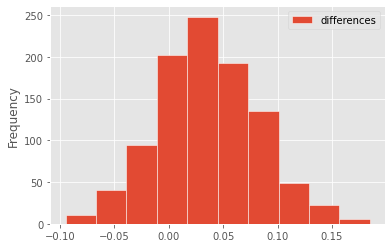

In [319]:
def differences_in_resamples():
    boot_diff_proportions = np.array([])  
    for i in np.arange(1000):
        resample = survey.sample(survey.shape[0], replace = True)
        proportion_difference = (
            (resample[resample.get("tea")=="jasmine"].shape[0] - resample[resample.get("tea")=="matcha"].shape[0]) 
            / survey.shape[0])
        boot_diff_proportions = np.append(boot_diff_proportions, proportion_difference)
    return boot_diff_proportions

boot_differences = differences_in_resamples()
boot_diff_df = bpd.DataFrame()
boot_diff_df = boot_diff_df.assign(differences = boot_differences)
boot_diff_df.plot(kind='hist', y='differences',ec='w');
# Plot a histogram of boot_differences.

In [320]:
grader.check("q3_8")

q3_8 results: All test cases passed!

**Question 3.9.** Compute an approximate 95% confidence interval for the difference in proportions. Assign the lower and upper bounds of the interval to `diff_lower_bound` and `diff_upper_bound`, respectively.

In [321]:
diff_lower_bound = np.percentile(boot_differences,2.5)
diff_upper_bound = np.percentile(boot_differences,97.5)

# Print the confidence interval:
print("Bootstrapped 95% confidence interval for the difference in popularity between jasmine tea and matcha tea:\n[{:f}, {:f}]".format(diff_lower_bound, diff_upper_bound))

Bootstrapped 95% confidence interval for the difference in popularity between jasmine tea and matcha tea:
[-0.050000, 0.130000]


In [322]:
#0.245000-0.140000=0.10499999999999998 matcha CI
#0.125000-(-0.055000)=0.18 diff proportion CI

In [323]:
grader.check("q3_9")

q3_9 results: All test cases passed!

**Question 3.10.** In this question, you computed two 95% confidence intervals:
- In Question 3.3, you found a 95% confidence interval for the proportion of residents who prefer `'matcha'` tea among the six tea options. Let's call this the "matcha CI."
- In Question 3.9, you found a 95% confidence interval for the difference between the proportion of residents who prefer `'jasmine'` tea and the proportion of residents who prefer `'matcha'` tea. Let's call this the "difference CI." 

Choose how to best fill in the blanks to describe the widths of these two confidence intervals. Set `q3_10` to either 1, 2, 3, or 4.

>The matcha CI is ________________________ than the difference CI because we have a ________________________ for a single unknown parameter than the difference between two unknown parameters.

1. wider; more accurate guess
1. narrower; more accurate guess
1. wider; less accurate guess
1. narrower; less accurate guess

In [324]:
q3_10 = 2

In [325]:
grader.check("q3_10")

q3_10 results: All test cases passed!

## 4. Housing Prices 🏡💸
Aaron just graduated from college and has received several job offers in different cities. Since he doesn't like to move often, he wants to choose a place where he can eventually settle down and buy a house.  He wants to estimate how expensive buying a house would be in each of the cities he might move to. Let's compare the housing prices in each city to help Aaron save some money! These are the cities Aaron is considering:

- New York City, New York
- Atlanta, Georgia
- Jacksonville, Florida
- Saint Louis, Missouri
- Dallas, Texas
- Tucson, Arizona
- Los Angeles, California
- San Diego, California

Our [dataset](https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset?resource=download) contains a **sample** of all realtor listings (for houses that are either for sale or already sold) in these cities. We have information on the `'price'` of each house, as well as where it is located (the `'city'`, which is one of the eight listed above). Run the cell below to load this data into the DataFrame `houses`.

In [326]:
houses = bpd.read_csv('data/houses.csv')
houses

,price,city
0,3600000.0,New York City
1,22000000.0,New York City
2,210000.0,New York City
3,775000.0,New York City
4,749000.0,New York City
...,...,...
68824,1650000.0,Los Angeles
68825,1950000.0,Los Angeles
68826,1979000.0,Los Angeles
68827,749999.0,Los Angeles


**Question 4.1.** Let's start by determining the mean house price for each of the eight cities. Create a DataFrame called `city_means`, indexed by `'city'`, with just one column called `'price'` that contains the mean house price for each city. Sort `city_means` in ascending order of `'price'`. It's okay if your answers are in scientific notation.

***Hint:*** This takes just one line of code.

In [327]:
city_means = houses.groupby("city").mean().sort_values(by='price')
city_means

,price
city,
Saint Louis,2.520368e+05
Jacksonville,3.307093e+05
Tucson,3.723433e+05
Dallas,6.060765e+05
Atlanta,6.361491e+05
San Diego,1.091343e+06
Los Angeles,1.917229e+06
New York City,2.266022e+06


In [328]:
grader.check("q4_1")

q4_1 results: All test cases passed!

**Question 4.2.** Based on the data we have, some cities appear to be a *lot* more expensive than others. But the data we have access to is only a sample of all house listings, and thus the mean prices we computed above are only sample statistics, not population parameters. Let's now extend each of our estimates to create a confidence interval for the mean price of **all** house listings in a city. We'll start with New York City, since it has the highest average listing price. 

Produce 1,000 bootstrapped estimates for the mean price of **all** New York City house listings. Store the estimates in the `nyc_means` array. Then, use the `nyc_means` array to calculate an approximate **99% confidence interval** for the true mean price of all New York City house listings. Assign the endpoints of your interval to `lower_bound` and `upper_bound`.

***Hint:*** Make sure to query **before** resampling!

'A 99% confidence interval for the average New York City house price is [2174737.4743070286, 2366128.248675004].'

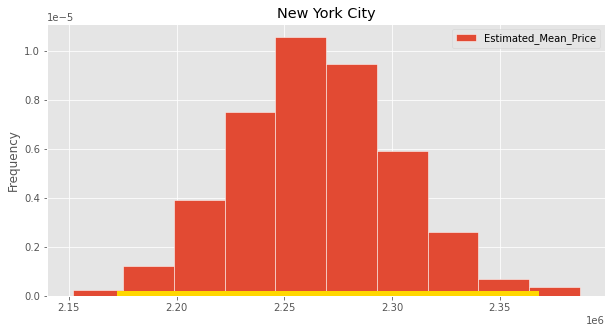

In [329]:
nyc_data = houses[houses.get("city")== 'New York City']
nyc_boot_mean = np.array([])
for i in np.arange(1000): 
    nyc_sample = nyc_data.sample(nyc_data.shape[0], replace =True)
    sample_mean =nyc_sample.get("price").mean()
    nyc_boot_mean = np.append(nyc_boot_mean, sample_mean)
nyc_means = nyc_boot_mean


lower_bound = np.percentile(nyc_means,0.5)
upper_bound = np.percentile(nyc_means,99.5)

# Display the estimates in a histogram.
bpd.DataFrame().assign(Estimated_Mean_Price=nyc_means).plot(kind='hist', density=True, ec='w', figsize=(10, 5), title='New York City')
plt.plot([lower_bound, upper_bound], [0, 0], color='gold', linewidth=10, label='99% confidence interval')

# Don't change what's below (though you will need to copy and change it in 4.3).
city_name = 'New York City'
f'A 99% confidence interval for the average {city_name} house price is [{lower_bound}, {upper_bound}].'

In [330]:
grader.check("q4_2")

q4_2 results: All test cases passed!

**Question 4.3.** Now we want to calculate the corresponding confidence interval for the remaining 7 cities. Instead of copying our code from Question 4.2 and changing it to work for each city, let's write a more general function that works for _any_ city we choose. 

Create a function called `city_and_hist`, which takes in the name of a city as a string, and:
1. **Plots the histogram** of 1,000 bootstrapped estimates for that city's mean house price.
2. **Returns** a string describing the approximate 99% confidence interval for that city's mean house price, formatted in the same way as the string displayed for New York City in Question 4.2. 

***Notes:*** 
- Make sure your function both plots a histogram and **returns** a string. For example, `city_and_hist('New York City')` should return a string that starts with `'A 99% confidence interval for the average New York City house price is'`. It's ok if you see the return string displayed before the plot.
- The string displayed at the end of Question 4.2 was created using a feature of Python called f-strings. You'll need to copy and change that f-string expression. Read [this article](https://realpython.com/python-f-strings/#simple-syntax) for more details about f-strings if you're interested.

A 99% confidence interval for the average New York City house price is [2174795.606819693, 2358811.770505382].
A 99% confidence interval for the average Jacksonville house price is [324504.01290604717, 338205.4860075985].


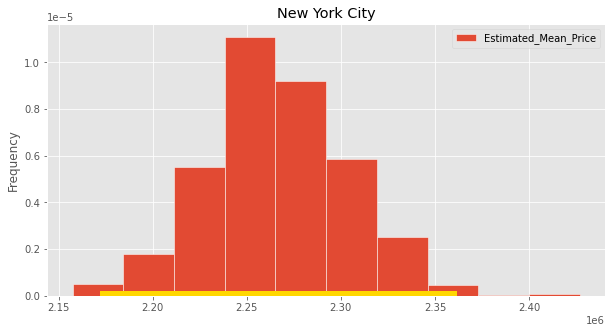

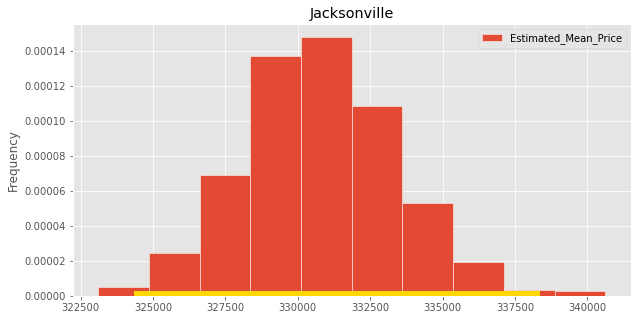

In [331]:
def city_and_hist(city_name):
    
    city_data = houses[houses.get("city")== city_name]
    city_boot_mean = np.array([])
    for i in np.arange(1000): 
        city_sample = city_data.sample(nyc_data.shape[0], replace =True)
        sample_mean =city_sample.get("price").mean()
        city_boot_mean = np.append(city_boot_mean, sample_mean)
    city_means = city_boot_mean


    lower_bound = np.percentile(city_means,0.5)
    upper_bound = np.percentile(city_means,99.5)

    # Display the estimates in a histogram.
    bpd.DataFrame().assign(Estimated_Mean_Price=city_means).plot(kind='hist', density=True, ec='w', figsize=(10, 5), title=city_name)
    plt.plot([lower_bound, upper_bound], [0, 0], color='gold', linewidth=10, label='99% confidence interval')

    # Don't change what's below (though you will need to copy and change it in 4.3).
    # city_name = 'New York City'
    return f'A 99% confidence interval for the average {city_name} house price is [{lower_bound}, {upper_bound}].'
    
# Example calls to the function. Don't change the lines below.
nyc_string = city_and_hist('New York City')
print(nyc_string)
jacksonville_string = city_and_hist('Jacksonville')
print(jacksonville_string)

In [332]:
grader.check("q4_3")

q4_3 results: All test cases passed!

Feel free to call the function you wrote on the other cities we've listed in this question&mdash;just do so in the cell below and don't change any lines above, as they are necessary for our tests to run! Which places are generally affordable? Which places are generally quite expensive? While we won't grade any further exploration you might do, this could be a very helpful exercise to formulate your own plans for the future!

A 99% confidence interval for the average Saint Louis house price is [244650.90999525093, 259212.2854234605].
A 99% confidence interval for the average Jacksonville house price is [325199.5652995884, 337663.9753098781].
A 99% confidence interval for the average Tucson house price is [366008.0570025328, 378741.2855493114].
A 99% confidence interval for the average Dallas house price is [585464.8665664081, 626645.252144214].
A 99% confidence interval for the average Atlanta house price is [582502.3796580655, 720416.1215691784].
A 99% confidence interval for the average San Diego house price is [1001088.7478344151, 1268381.2143576855].
A 99% confidence interval for the average Los Angeles house price is [1807360.6435159093, 2037962.4011963748].
A 99% confidence interval for the average New York City house price is [2179104.004663606, 2355251.726161944].


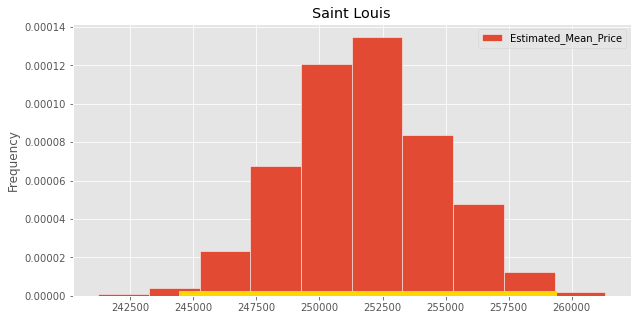

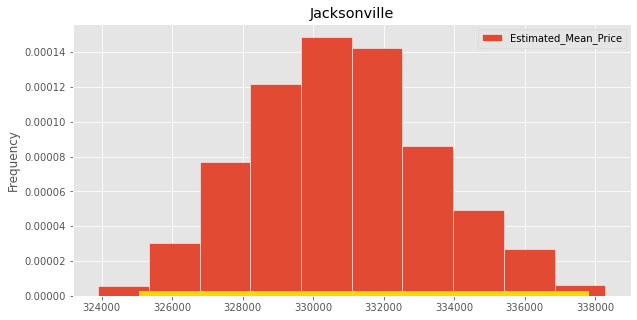

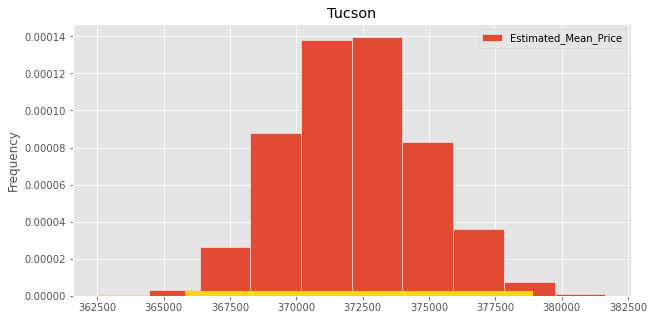

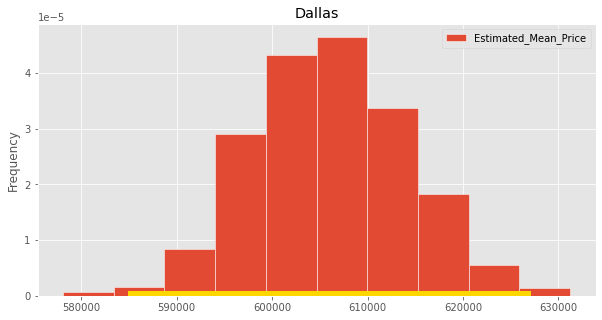

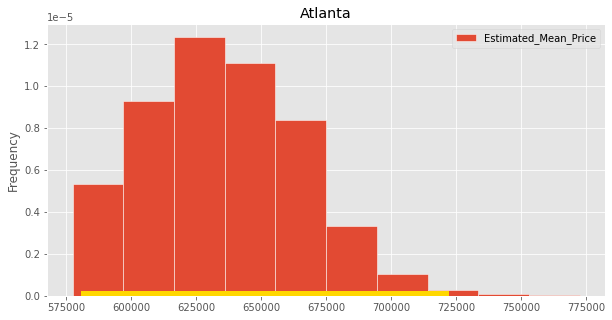

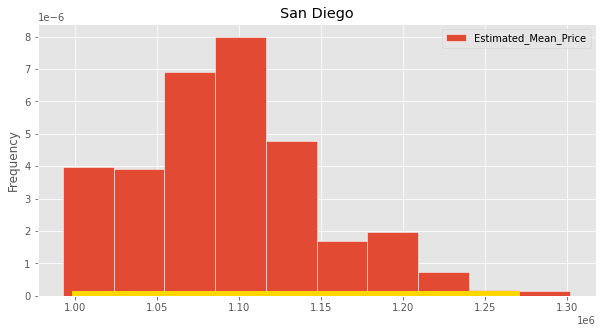

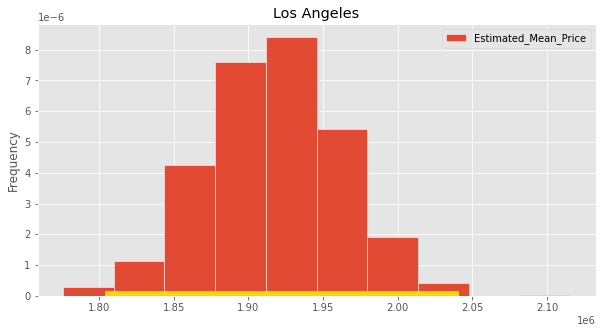

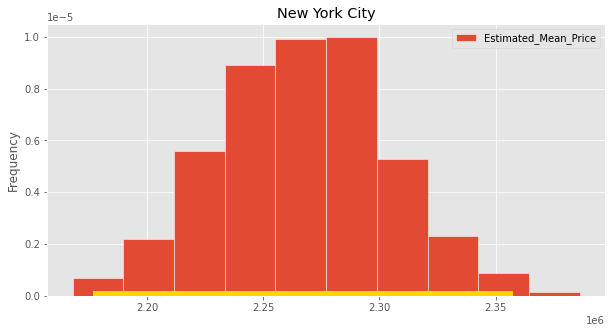

In [333]:
# Experiment here, if you'd like!
name_of_cities = np.array(['Saint Louis','Jacksonville',
                           'Tucson','Dallas','Atlanta',
                           'San Diego','Los Angeles','New York City'])


for i in name_of_cities:
    citteeeee_string = city_and_hist(i)
    print(citteeeee_string)

## Finish Line: Almost there, but make sure to follow the steps below to submit! 🏁

**_Citations:_** Did you use any generative artificial intelligence tools to assist you on this assignment? If so, please state, for each tool you used, the name of the tool (ex. ChatGPT) and the problem(s) in this assignment where you used the tool for help.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

Please cite tools here.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
2. Read through the notebook to make sure everything is fine and all tests passed.
3. Run the cell below to run all tests, and make sure that they all pass.
4. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.
5. Stick around while the Gradescope autograder grades your work. Make sure you see that all tests have passed on Gradescope.
6. Check that you have a confirmation email from Gradescope and save it as proof of your submission. 

In [334]:
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q1_5 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q2_4 results: All test cases passed!

q2_5 results: All test cases passed!

q3_1 results: All test cases passed!

q3_10 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!

q3_4 results: All test cases passed!

q3_5 results: All test cases passed!

q3_6 results: All test cases passed!

q3_7 results: All test cases passed!

q3_8 results: All test cases passed!

q3_9 results: All test cases passed!

q4_1 results: All test cases passed!

q4_2 results: All test cases passed!

q4_3 results: All test cases passed!